In [30]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scikitplot as skplt
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt

In [2]:
credicard = pd.read_csv('creditcard.csv')

In [3]:
credicard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credicard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credicard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credicard.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


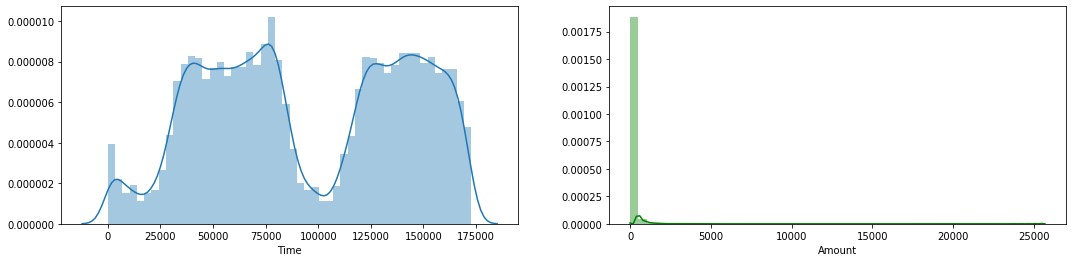

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(credicard['Time'], ax=ax[0])
sns.distplot(credicard['Amount'], ax=ax[1], color='g')

In [8]:
nm = NearMiss()

In [9]:
X = credicard.drop('Class', axis=1)
y = credicard['Class']

In [10]:
X, y = nm.fit_sample(X, y)

In [11]:
credicard_balanceado = pd.concat([X,y], axis=1)

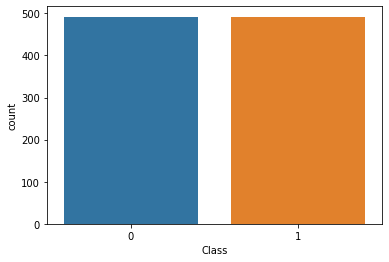

In [12]:
sns.countplot(x=credicard_balanceado['Class'])

**Boxplot dos dados não padronizados**

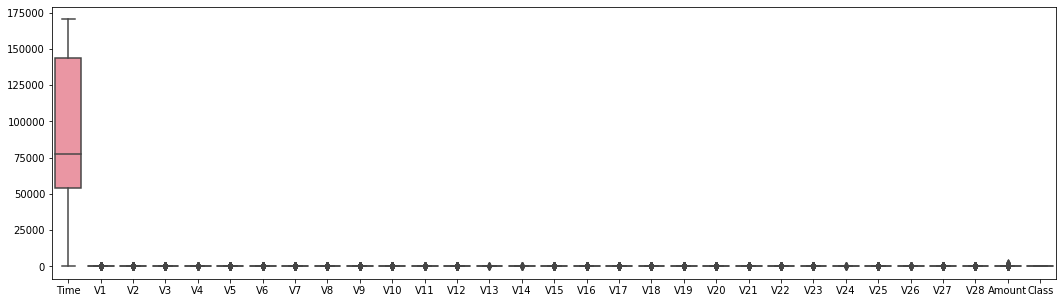

In [67]:
plt.figure(figsize=(18,5))
sns.boxplot(data=credicard_balanceado)

**Correlação com dados não padronizados/normalizados**

Vou plotar um gráfico de correlação apenas para mostrar que como os dados não estão normalizados ou padronizados haverá poucas variavéis correlacionadas a variavél "Class".

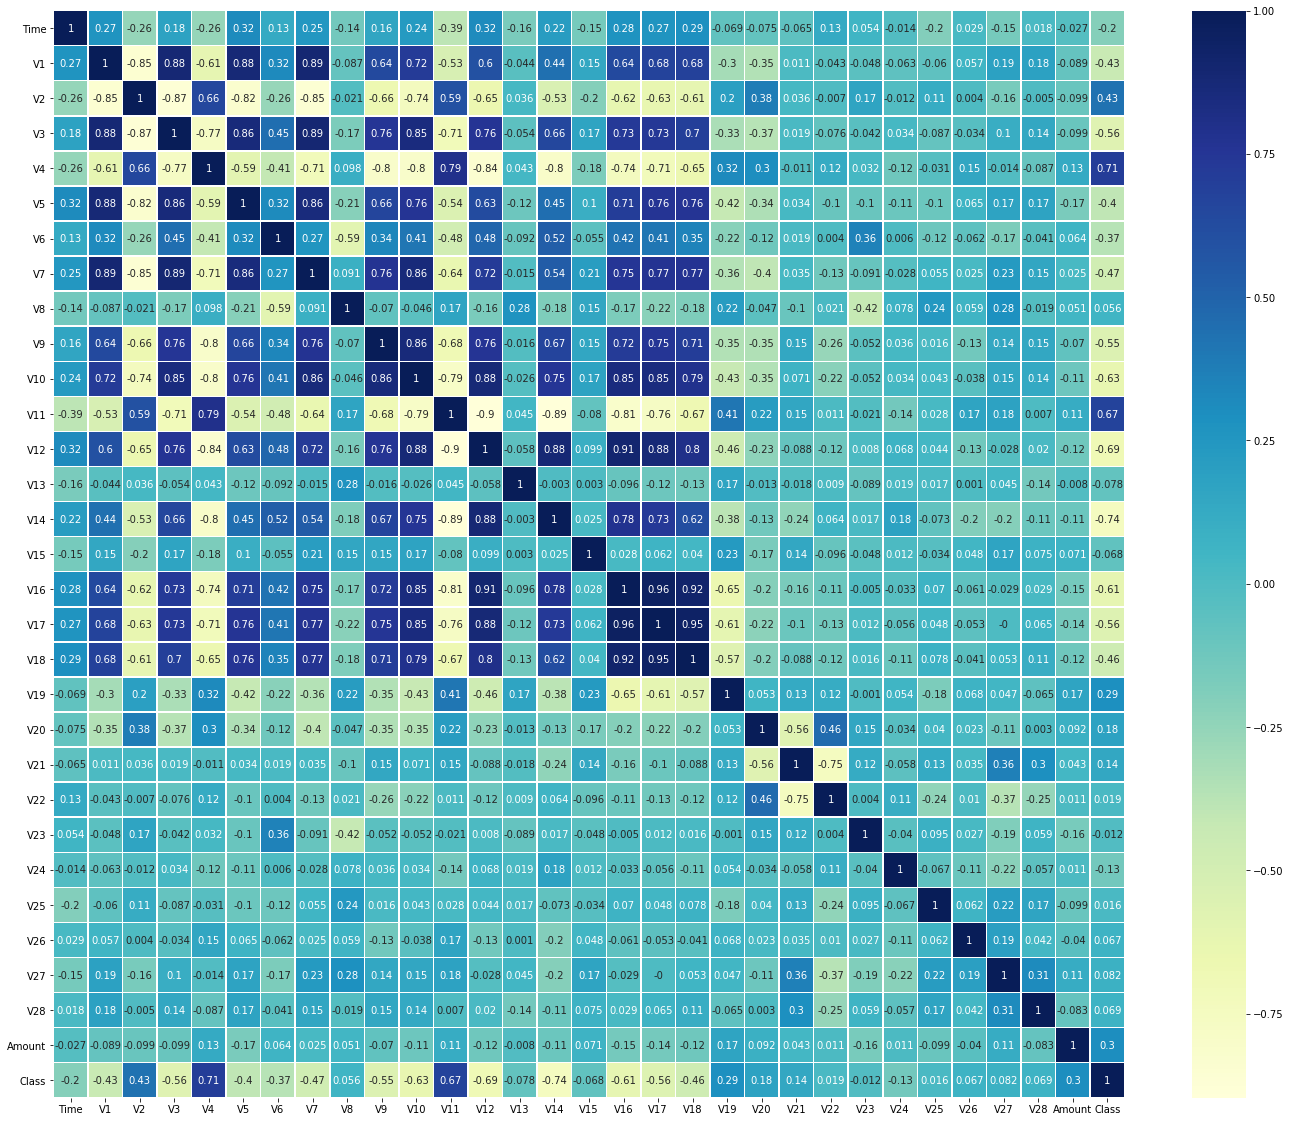

In [68]:
corr = credicard_balanceado.corr().round(3)
plt.figure(figsize=(24,20))
sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

Pouca correlação das variavéis com a variável "Class".

In [31]:
scaler = StandardScaler().fit(X)
minmax = MinMaxScaler().fit(X)

In [32]:
credicard_scaler = scaler.transform(X)
credicard_minmax = minmax.transform(X)

In [33]:
credicard_scaler = pd.DataFrame(credicard_scaler)
credicard_minmax = pd.DataFrame(credicard_minmax)

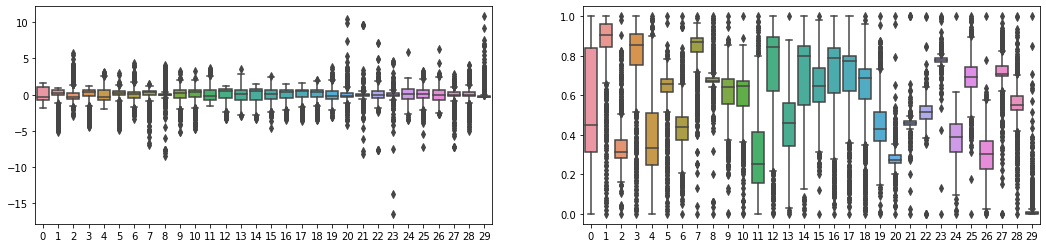

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(data=credicard_scaler, ax=ax[0])
sns.boxplot(data=credicard_minmax, ax=ax[1])

**Histograma das variavéis "Time" e "Amount"**

Note que a forma dos gráficos são iguais, porém o intervalo de cada um é diferente.

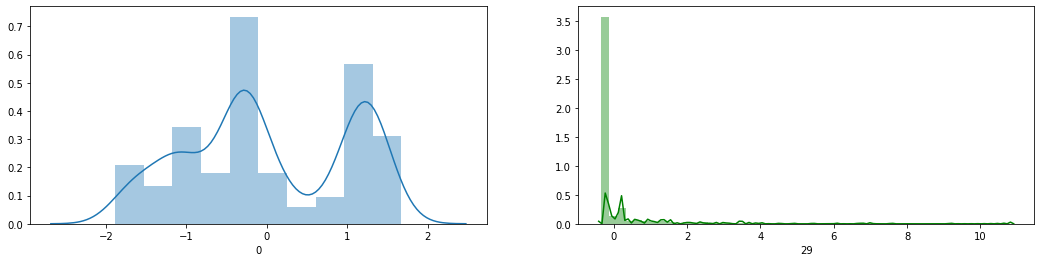

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(credicard_scaler[0], ax=ax[0])
sns.distplot(credicard_scaler[29], ax=ax[1], color='g')

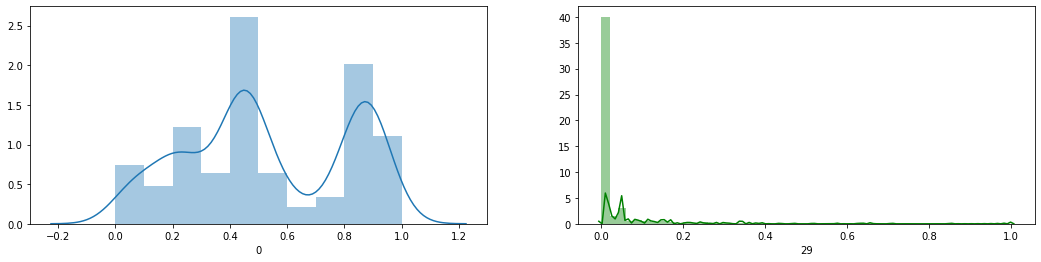

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(credicard_minmax[0], ax=ax[0])
sns.distplot(credicard_minmax[29], ax=ax[1], color='g')

In [44]:
credicard_scaler = pd.concat([credicard_scaler,y], axis=1)
credicard_minmax = pd.concat([credicard_minmax,y], axis=1)

In [47]:
credicard_scaler.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,984.0,-3.723309e-17,1.000509,-1.884385,-0.768181,-0.276631,1.111002,1.674274
1,984.0,-1.478041e-17,1.000509,-5.121050,-0.088833,0.300032,0.629630,0.853739
2,984.0,-3.365646e-16,1.000509,-3.008761,-0.550856,-0.281476,0.234915,5.704744
3,984.0,-1.869270e-16,1.000509,-4.439190,-0.251859,0.333667,0.626508,1.136370
4,984.0,2.956082e-17,1.000509,-2.009181,-0.735061,-0.309928,0.610333,3.099607
5,984.0,2.482206e-16,1.000509,-4.885722,-0.042228,0.288241,0.491303,2.970974
6,984.0,2.661038e-16,1.000509,-3.370653,-0.466884,0.032746,0.414380,4.357043
7,984.0,-1.371983e-16,1.000509,-6.990507,-0.051002,0.371871,0.527142,1.474868
8,984.0,1.074682e-17,1.000509,-8.456694,-0.098722,-0.027944,0.126281,4.032401
9,984.0,3.022650e-16,1.000509,-5.217735,-0.444700,0.277768,0.607420,3.340251


Aplicando a padronização o desvio padrão é igual.

In [48]:
credicard_minmax.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,984.0,0.529521,0.281148,0.0,0.313658,0.451786,0.841718,1.0
1,984.0,0.857110,0.167455,0.0,0.842242,0.907326,0.962491,1.0
2,984.0,0.345299,0.114823,0.0,0.282080,0.312995,0.372258,1.0
3,984.0,0.796187,0.179445,0.0,0.751015,0.856032,0.908554,1.0
4,984.0,0.393279,0.195841,0.0,0.249398,0.332614,0.512747,1.0
5,984.0,0.621855,0.127345,0.0,0.616480,0.658542,0.684388,1.0
6,984.0,0.436178,0.129470,0.0,0.375761,0.440416,0.489801,1.0
7,984.0,0.825776,0.118188,0.0,0.819752,0.869705,0.888047,1.0
8,984.0,0.677126,0.080111,0.0,0.669222,0.674889,0.687238,1.0
9,984.0,0.609692,0.116909,0.0,0.557729,0.642149,0.680669,1.0


Aplicando a normalização o meu valor mínimo é 0 e o máximo é 1.

## Aplicando um modelo de Machine Learning

Vamos aplicar um modelo de regressão logística para saber qual método foi mais eficaz.

In [76]:
rl = LogisticRegression()

**Dados Originais**

In [69]:
X = credicard_balanceado.drop(['Class'], axis=1)
y = credicard_balanceado['Class']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [71]:
rl.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred = rl.predict(X_test)

In [73]:
accuracy_score(y_test, y_pred)

0.9349593495934959

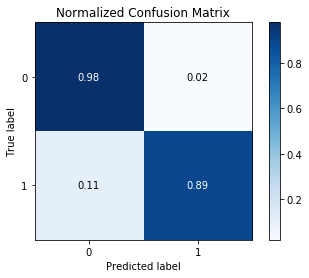

In [75]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

**Dados Padronizados**

In [51]:
X = credicard_scaler.drop(['Class'], axis=1)
y = credicard_scaler['Class']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [53]:
rl.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = rl.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.959349593495935

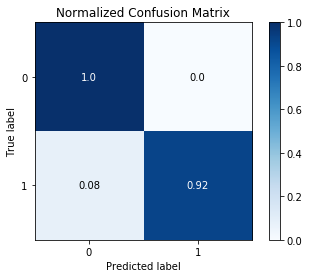

In [57]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

**Dados Normalizados**

In [59]:
X = credicard_minmax.drop(['Class'], axis=1)
y = credicard_minmax['Class']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [61]:
rl.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = rl.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.9227642276422764

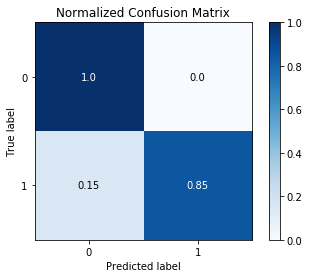

In [65]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

O mais importante de acertar nesses casos de fraude, são os casos que realmente são fraudes e o algoritmo classificou corretamente como fraude. Os dados padronizados foram os que tiveram mais acerto neste caso, acertando 92%